Praca Magisterska - budowa optymalnego portfela na podstawie wybranych klas aktywów
Tomasz G

Zrodlo api: 

In [1]:
#libraries

from urllib.request import urlretrieve
from datetime import datetime
import pandas as pd
import mplfinance as mpl #https://pypi.org/project/mplfinance/
import os
import string
import re


Useful:  
https://campus.datacamp.com/courses/introduction-to-portfolio-analysis-in-python/introduction-to-portfolio-analysis?ex=9
dir() #list of variables  
%whos #list of objects in environment  

Stooq notes:  
Indices are prefixed by ^ e.g. ^DJI (Dow Jones Industrial), ^UK100 (FTSE100)  
US stocks are suffixed by .US e.g. AAPL.US, MSFT.US, TSLA.US  
Cryptocurrencies are suffixed by .V e.g. BTC.V (BitCoin)  
UK stocks are suffixed by .UK e.g. AV.UK (Aviva)  
Price/Earnings are suffixed by _PE.US e.g. AAPL_PE.US  


Libraries to explore:
https://www.activestate.com/blog/top-10-python-packages-for-finance-and-financial-modeling/
https://quantlib-python-docs.readthedocs.io/en/latest/
https://github.com/quandl/quandl-python
https://github.com/quantopian/pyfolio
https://gbeced.github.io/pyalgotrade/docs/v0.20/html/tutorial.html

In [2]:
# PARAMETERS for calculations
portfolio_securities = ["SPX","V80ADE","WIG","PKO"] # securities chosen  for your porfolio
portfolio_weights = [0.25, 0.25, 0.25 ,0.25] # weights for your securities in portfolio. Number of weights must match number of securities
capital = 100000 #starting capital

In [3]:
ticker_list = ['WIG','WIG20','^SPX','V80A.DE','^TBSP','EURPLN','USDPLN','BTC.V','XAGPLN','XAUPLN','HUG','KGH','PCF','PKO','PZU',
              'AAPL.US', 'MSFT.US', 'AMZN.US', 'GOOGL.US', 'GOOG.US', 'TSLA.US', 'NVDA.US', 'META.US', 'BRK-B.US', 'UNH.US']

# WIG - indeks WIG
# WIG20 - indeks 20 największych spółek indeksu WIG
# ^SPX - indeks S&P 500
# V80A.DE - ETF Vanguard Life Strategy 80/20 ACC notowany na gieldzie Xetra (portfelm na DM BOS IKE)
# ^TBSP - indeks polskich obligacji skarbowych
# EURPLN - kurs wymiany eur/pln
# USDPLN - kurs wymian usd/pln
# BTC.V - bitcoin
# XAGPLN - srebro (ozt - uncja trojanska - 31,1034768 g)
# XAUPLN - zloto (ozt - uncja trojanska - 31,1034768 g)
# HUG - Huuuge Inc (producent gier; portfel na MBANK)
# KGH - KGHM (wydobywca surowców; portfel na MBANK)
# PCF - PFC Group (producent gier; portfel na MBANK)
# PKO - PKO BP (bank polski; porfel na MBANK)
# PZU - PZU (ubezpieczyciel; portfel na MBANK)

In [4]:
#Parameters
#List of securities / variables to track
data_folder="data/"

os.makedirs(data_folder, exist_ok=True)

In [5]:
for ticker in ticker_list:
    interval = 'd'
    url = f'https://stooq.com/q/d/l/?s={ticker}&i={interval}'
    csv_file = data_folder + ticker + '.csv'
    urlretrieve(url, csv_file)

In [6]:
path, dirs, files = next(os.walk("./data"))
print(path)
print(dirs)
print(files)

./data
[]
['AAPL.US.csv', 'AMZN.US.csv', 'BRK-B.US.csv', 'BTC.V.csv', 'EURPLN.csv', 'GOOG.US.csv', 'GOOGL.US.csv', 'HUG.csv', 'KGH.csv', 'META.US.csv', 'MSFT.US.csv', 'NVDA.US.csv', 'PCF.csv', 'PKO.csv', 'PZU.csv', 'TSLA.US.csv', 'UNH.US.csv', 'USDPLN.csv', 'V80A.DE.csv', 'WIG.csv', 'WIG20.csv', 'XAGPLN.csv', 'XAUPLN.csv', '^SPX.csv', '^TBSP.csv']


In [7]:
# Creating list of dataframe names out of tickers list 
# Deleting special characters
files_clean = []
pattern = r'[' + string.punctuation + ']'
for file in ticker_list:
    sample_str = re.sub(pattern, '', file)
    files_clean.append(sample_str)
    
# Sorting to match files order
files_clean.sort()

# Adjusting order of list to match files order - manual
element = 'SPX'
del files_clean[files_clean.index(element)]
files_clean.append(element)
element = 'TBSP'
del files_clean[files_clean.index(element)]
files_clean.append(element)

#displaying list
files_clean


['AAPLUS',
 'AMZNUS',
 'BRKBUS',
 'BTCV',
 'EURPLN',
 'GOOGLUS',
 'GOOGUS',
 'HUG',
 'KGH',
 'METAUS',
 'MSFTUS',
 'NVDAUS',
 'PCF',
 'PKO',
 'PZU',
 'TSLAUS',
 'UNHUS',
 'USDPLN',
 'V80ADE',
 'WIG',
 'WIG20',
 'XAGPLN',
 'XAUPLN',
 'SPX',
 'TBSP']

In [8]:
# Create a dictionary containing security name and corresponding dataframe
securities = dict()
for i, row in enumerate(files):
    print(row)
    dfName = files_clean[i]
    dfNew = pd.read_csv("./data/"+row, index_col='Date', parse_dates=['Date'],
                date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d'))
    securities[dfName] = dfNew

#Check key names
securities.keys()

AAPL.US.csv
AMZN.US.csv
BRK-B.US.csv
BTC.V.csv
EURPLN.csv
GOOG.US.csv
GOOGL.US.csv
HUG.csv
KGH.csv
META.US.csv
MSFT.US.csv
NVDA.US.csv
PCF.csv
PKO.csv
PZU.csv
TSLA.US.csv
UNH.US.csv
USDPLN.csv
V80A.DE.csv
WIG.csv
WIG20.csv
XAGPLN.csv
XAUPLN.csv
^SPX.csv
^TBSP.csv


dict_keys(['AAPLUS', 'AMZNUS', 'BRKBUS', 'BTCV', 'EURPLN', 'GOOGLUS', 'GOOGUS', 'HUG', 'KGH', 'METAUS', 'MSFTUS', 'NVDAUS', 'PCF', 'PKO', 'PZU', 'TSLAUS', 'UNHUS', 'USDPLN', 'V80ADE', 'WIG', 'WIG20', 'XAGPLN', 'XAUPLN', 'SPX', 'TBSP'])

In [9]:
securities["SPX"]["daily_return"]=securities["SPX"]["Close"].pct_change()
securities["SPX"]["cum_return"]=(securities["SPX"]["daily_return"]+1).cumprod()
securities["SPX"]

,Open,High,Low,Close,Volume,daily_return,cum_return
Date,,,,,,,
1789-05-01,0.51,0.51,0.51,0.51,NaN,NaN,NaN
1789-06-01,0.51,0.51,0.51,0.51,NaN,0.000000,1.000000
1789-07-01,0.50,0.50,0.50,0.50,NaN,-0.019608,0.980392
1789-08-01,0.50,0.51,0.50,0.51,NaN,0.020000,1.000000
1789-09-01,0.51,0.51,0.50,0.51,NaN,0.000000,1.000000
...,...,...,...,...,...,...,...
2022-11-16,3976.82,3983.09,3954.34,3958.79,2.405875e+09,-0.008252,7762.333333
2022-11-17,3919.26,3954.33,3906.54,3946.56,2.196018e+09,-0.003089,7738.352941
2022-11-18,3966.39,3979.89,3935.98,3965.34,2.233623e+09,0.004759,7775.176471


In [11]:
#BUDOWA PORTFOLIO

portfolio = pd.DataFrame()
for item in portfolio_securities:
    item = pd.Series(data=securities[item]["Close"], name=item)
    portfolio = pd.merge(portfolio, item, how='outer', left_index=True, right_index=True)
    
    

In [12]:
portfolio

,SPX,V80ADE,WIG,PKO
Date,,,,
1789-05-01,0.51,NaN,NaN,NaN
1789-06-01,0.51,NaN,NaN,NaN
1789-07-01,0.50,NaN,NaN,NaN
1789-08-01,0.51,NaN,NaN,NaN
1789-09-01,0.51,NaN,NaN,NaN
...,...,...,...,...
2022-11-17,3946.56,27.370,54791.43,27.88
2022-11-18,3965.34,27.515,54891.25,28.06
2022-11-21,3949.94,27.630,54259.77,27.86


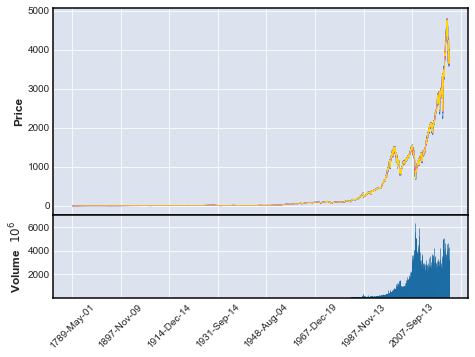

In [13]:
mpl.plot(securities["SPX"], type='line', volume=True, mav=(3,6,9))

In [ ]:
mpl.plot(securities["V80ADE"], type='candle', volume=True, mav=(3,6,9))